# Learning Objectives

By the end of this lesson students will be able to:

- Understand and apply the split-apply-combine strategy to analyze grouped data
- Use groupby() to split a pandas.DataFrame by one or more columns
- Calculate summary statistics for groups in a pandas. Dataframe
- Use method chaining for efficient data analysis

# About the data

Penguins

In [1]:
import numpy as np 
import pandas as pd

# laod palmer penguins data

URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'

penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Summary Statistics

- sum()
- count()
- min() and max()
- mean() and median()
- std() and var()

In [2]:
# get the number of non-NA values in each columns
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [3]:
# get min value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

# Grouping
Our penguin data is naturally split into different groups: there are threee different specie,two sexes, and three islands. Often, we want to calculate a certain statistic for each group. For example, suppose we want to calculate the average flipper length per species. How would we do this "by hand"?

0) we start with our data and notice the multiple species

1) we split our og table to group all observations from the same species

2) we calculate the average flipper length for each of the groups we formed

3) then we combine the values for average flipper length per species into a single table

This is know as the split-apply-combine strategy. This strategy follow the three steps explained above:

1) Split: split the data into logical groups
2) apply: calc some summary stat on each group
3) combine: combine the stat claculated on each group back together

For a pandas.Dataframe or series, we can use a groupby() method to split (group) the data into different categories

The general syntax is 

In [ ]:
df.groupby(col_to_group).summary_method()

#Most often, we will have that columns_to_group_by will be a single column name (string) or of a list of column names. The unique values of the column (or columns) will be used as the groups of the df


# Example

If we dont use groupby() and directly apply the mean() method to our flipper length column, we obtain the average of all the values in the column:


In [4]:
penguins['flipper_length_mm'].mean()

200.91520467836258

To get the mean flipper length by species we first group our dataset by the species column values. However, if we just use the groupby without specifying what we want to calc on each group, not much happens

In [5]:
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

# Note

Notice that the name of the series is the same as the column on which we calc the summary stat. We can easily update this ising the rename() method:

In [7]:
avg_flipper = (penguins.groupby('species')
              .flipper_length_mm
              .mean()
              .rename('mean_flipper_length')
               .sort_values(ascending = False)
              )
avg_flipper

species
Gentoo       217.186992
Chinstrap    195.823529
Adelie       189.953642
Name: mean_flipper_length, dtype: float64

# Example
We want to know what was the num pengioons surveyed in each island on dif years. We can use count() 

In [8]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [9]:
penguins.groupby(['island','year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

Lets say we want to plot the surveyed pop per year and island. We could then use method chaining to do this:

<Axes: title={'center': 'Penguins surveyed at the palmer archipeligo'}, ylabel='(island, year)'>

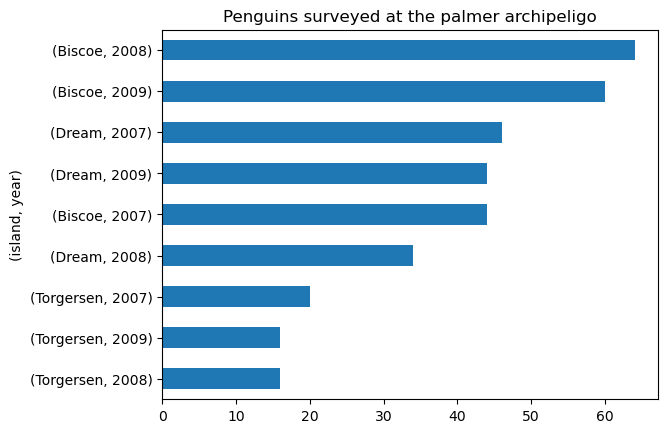

In [13]:
(penguins.groupby(['island','year'])
.count()
.species
.sort_values()
.plot(kind = 'barh',
     title = "Penguins surveyed at the palmer archipeligo",
     ylabel = ('island', 'year'))
)

# Check in

Use the max() method for pandas.DataFrames to calculate the maximum value of a penguin’s body mass by year and speciesm

Use (1) to display the highest body masses per year and species as a bar plot in descending order.

In [15]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [16]:
penguins.groupby(['species', 'year']).max('body_mass_g')

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
species   year                                                               
Adelie    2007            46.0           21.5              198.0       4675.0
          2008            45.8           21.1              208.0       4700.0
          2009            45.6           20.7              210.0       4775.0
Chinstrap 2007            58.0           20.3              201.0       4400.0
          2008            54.2           20.8              210.0       4800.0
          2009            55.8           19.9              212.0       4450.0
Gentoo    2007            59.6           17.0              230.0       6300.0
          2008            54.3           17.3              231.0       6000.0
          2009            55.9           17.3              230.0       6000.0

In [25]:
(penguins.groupby(['species', 'year'])
.max('body_mass_g')
.species
.sort_values()
.plot(kind = "harh",
      title = "largest penguins by species and of the year",
      ylabel = ('island','year'))
)
 
 

TypeError: agg function failed [how->max,dtype->object]